<a href="https://colab.research.google.com/github/principioincertidumbre/ComputerVision/blob/main/IntroCV_Tarea_2_Sof%C3%ADa_Vits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <h1>Introducción a la Visión Computacional</h1>
    <h1>Tarea 2</h1>
</center>

### Magíster en Data Science
### U. del Desarrollo

-----------------------
<div align="right">

Estudiante: Sofía Vits

Profesor: Takeshi Asahi

Fecha de Entrega: Lunes 5, Mayo 2025
</div>

# Introducción

La papa es un tubérculo que fue domesticado en la región andina de Sudamérica. Junto con el trigo y arroz, es uno de los cultivos más importantes para la alimentación de la especie humana.

Lamentablemente, existen enfermedades de las papas que generan pérdidas económicas y afectan la calidad del producto final. Por lo tanto, es importante detectar estas enfermedades a tiempo.

El dataset "Potato Diseases Datasets" fue compilado a partir de diversas páginas web, siendo validado por el Instituto de Investigación Agrícola de Bangladesh (BARI).

El dataset completo contiene 451 imágenes, siendo clasificadas como common scab (papas infectadas por bacteria Streptomyces scabies, contiene 62 imágenes), blackleg (papas infectadas por bacteria Pectobacterium atrosepticum, contiene 60 imágenes), dry rot (infección causada por hongos del género Fusarium, contiene 60 imágenes), pink rot (infección fúngica causada por Phytophthora erythroseptica, contiene 57 imágenes), black scurf (infección fúngica, contiene 58 imágenes), papas sanas (80 imágenes) y papas afectadas por otros tipos de infecciones (74 imágenes).

Considerando las enfermedades más comunes de la papa en Chile, se considerarán las clases common scab, blackleg, dry rot y papas sanas para realizar una clasificación multiclase mediante el algoritmo Support Vector Machine (SVM). Esta muestra del dataset contiene 262 imágenes en total.


Dataset utilizado:

https://www.kaggle.com/datasets/mukaffimoin/potato-diseases-datasets/

Fuente del dataset:

F. T. J. Faria, M. Bin Moin, A. Al Wase, M. R. Sani, K. M. Hasib and M. S. Alam, "Classification of Potato Disease with Digital Image Processing Technique: A Hybrid Deep Learning Framework," 2023 IEEE 13th Annual Computing and Communication Workshop and Conference (CCWC), Las Vegas, NV, USA, 2023, pp. 0820-0826, doi: 10.1109/CCWC57344.2023.10099162.

Otras fuentes:

Centro Internacional de la Papa. "Datos y cifras de la papa". Recuperado de: https://cipotato.org/es/potato/potato-facts-and-figures/

Méndez, P., Gaete, N. "Principales enfermedades que afectan al cultivo de la papa", INIA Carillanca. Recuperado de: https://tizon.inia.cl/assets/boletines/inia%20carillanca%20-%20principales%20enfermedades%20que%20afectan%20el%20cultivo%20de%20la%20papa.pdf

North Dakota State University. "Common scab". Recuperado de: https://www.ag.ndsu.edu/potatoextension/common-scab

The Royal Horticultural Society. "Potato blackleg". Recuperado de: https://www.rhs.org.uk/disease/potato-blackleg

Cornell University. "Fusarium Dry Rot of Potato". Recuperado de: https://www.vegetables.cornell.edu/pest-management/disease-factsheets/fusarium-dry-rot-of-potato/

# Metodología

1.- Cargar la muestra del dataset y ordenar las carpetas a utilizar para el algoritmo de clasificación SVM multiclase.

2.- Implementar algoritmo de clasificación SVM multiclase, midiendo el tiempo mínimo, tiempo máximo, tiempo promedio y desviación estándard del tiempo de procesamiento.

3.- Comparar los resultados mediante métricas para verificar qué tipo de preprocesamiento permite obtener los mejores resultados.


# Desarrollo

## Flujo de procesamiento abstracto


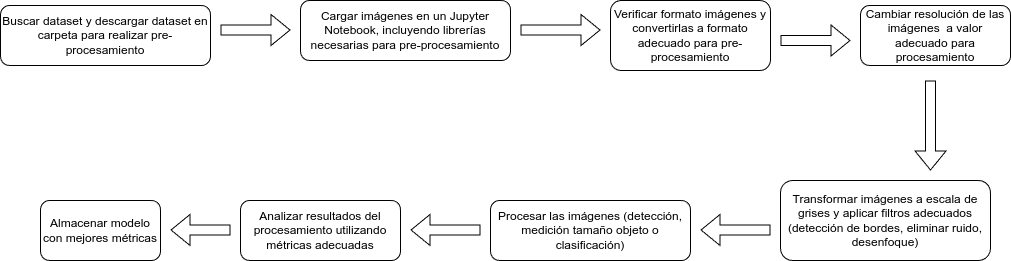

## Carga de librerías y definición de rutas de las carpetas que contienen las imágenes de la muestra del dataset

In [ ]:
from PIL import Image
from os.path import exists
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC
import pandas as pd
import time
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Abrir una imagen de cada carpeta que contiene imágenes de papas enfermas o sanas

inPath1  = '/content/drive/MyDrive/potato/Common Scab proc'
inPath2  = '/content/drive/MyDrive/potato/Blackleg proc'
inPath3  = '/content/drive/MyDrive/potato/Dry Rot proc'
inPath4 = '/content/drive/MyDrive/potato/Healthy Potatoes proc'
inPath5 = '/content/drive/MyDrive/potato/Common Scab Gauss'
inPath6 = '/content/drive/MyDrive/potato/Blackleg Gauss'
inPath7 = '/content/drive/MyDrive/potato/Dry Rot Gauss'
inPath8 = '/content/drive/MyDrive/potato/Healthy Potatoes Gauss'
inPath9 = '/content/drive/MyDrive/potato/Common Scab Sobel'
inPath10 = '/content/drive/MyDrive/potato/Blackleg Sobel'
inPath11 = '/content/drive/MyDrive/potato/Dry Rot Sobel'
inPath12 = '/content/drive/MyDrive/potato/Healthy Potatoes Sobel'
inPath13 = '/content/drive/MyDrive/potato/Common Scab Max'
inPath14 = '/content/drive/MyDrive/potato/Blackleg Max'
inPath15 = '/content/drive/MyDrive/potato/Dry Rot Max'
inPath16 = '/content/drive/MyDrive/potato/Healthy Potatoes Max'
inPath17 = '/content/drive/MyDrive/potato/Common Scab Min'
inPath18 = '/content/drive/MyDrive/potato/Blackleg Min'
inPath19 = '/content/drive/MyDrive/potato/Dry Rot Min'
inPath20 = '/content/drive/MyDrive/potato/Healthy Potatoes Min'

# Define carpetas de salida, las cuales serán creadas posteriormente en este trabajo

outPath1  = '/content/drive/MyDrive/potato/data/common_scab'
outPath2  = '/content/drive/MyDrive/potato/data/blackleg'
outPath3  = '/content/drive/MyDrive/potato/data/dry_rot'
outPath4 = '/content/drive/MyDrive/potato/data/healthy_potato'
outPath5 = '/content/drive/MyDrive/potato/data_g/common_scab'
outPath6 = '/content/drive/MyDrive/potato/data_g/blackleg'
outPath7 = '/content/drive/MyDrive/potato/data_g/dry_rot'
outPath8 = '/content/drive/MyDrive/potato/data_g/healthy_potato'
outPath9 = '/content/drive/MyDrive/potato/data_s/common_scab'
outPath10 = '/content/drive/MyDrive/potato/data_s/blackleg'
outPath11 = '/content/drive/MyDrive/potato/data_s/dry_rot'
outPath12 = '/content/drive/MyDrive/potato/data_s/healthy_potato'
outPath13 = '/content/drive/MyDrive/potato/data_max/common_scab'
outPath14 = '/content/drive/MyDrive/potato/data_max/blackleg'
outPath15 = '/content/drive/MyDrive/potato/data_max/dry_rot'
outPath16 = '/content/drive/MyDrive/potato/data_max/healthy_potato'
outPath17 = '/content/drive/MyDrive/potato/data_min/common_scab'
outPath18 = '/content/drive/MyDrive/potato/data_min/blackleg'
outPath19 = '/content/drive/MyDrive/potato/data_min/dry_rot'
outPath20 = '/content/drive/MyDrive/potato/data_min/healthy_potato'

## Ordena imágenes en carpetas para facilitar su procesamiento

In [ ]:
# Copia archivos

import glob

# Carpeta Common Scab
path = outPath1 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path):
    os.makedirs(path)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab proc/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path2 = outPath2

if not os.path.exists(path2):
    os.makedirs(path2)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path2,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path3 = outPath3

if not os.path.exists(path3):
    os.makedirs(path3)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path3,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path4 = outPath4

if not os.path.exists(path4):
    os.makedirs(path4)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path4,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Gaussiano

import glob

# Carpeta Common Scab
path5 = outPath5 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path5):
    os.makedirs(path5)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Gauss/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path5,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path6 = outPath6

if not os.path.exists(path6):
    os.makedirs(path6)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path6,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path7 = outPath7

if not os.path.exists(path7):
    os.makedirs(path7)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path7,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path8 = outPath8

if not os.path.exists(path8):
    os.makedirs(path8)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path8,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Sobel

import glob

# Carpeta Common Scab
path9 = outPath9 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path9):
    os.makedirs(path9)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Sobel/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path9,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path10 = outPath10

if not os.path.exists(path10):
    os.makedirs(path10)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Sobel/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path10,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path11 = outPath11

if not os.path.exists(path11):
    os.makedirs(path11)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path11,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path12 = outPath12

if not os.path.exists(path12):
    os.makedirs(path12)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path12,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Máximo

import glob

# Carpeta Common Scab
path13 = outPath13 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path13):
    os.makedirs(path13)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Max/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path13,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path14 = outPath14

if not os.path.exists(path14):
    os.makedirs(path14)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Max/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path14,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path15 = outPath15

if not os.path.exists(path15):
    os.makedirs(path15)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Max/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path15,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path16 = outPath16

if not os.path.exists(path16):
    os.makedirs(path16)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Max/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path16,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Mínimo

import glob

# Carpeta Common Scab
path17 = outPath17 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path17):
    os.makedirs(path17)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Min/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path17,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path18 = outPath18

if not os.path.exists(path18):
    os.makedirs(path18)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Min/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path18,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path19 = outPath19

if not os.path.exists(path19):
    os.makedirs(path19)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Min/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path19,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path20 = outPath20

if not os.path.exists(path20):
    os.makedirs(path20)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Min/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path20,'/',os.path.split(filename)[1]))

## Clasificador Support Vector Machine para dataset sin filtrar

La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [ ]:
Categoría=['blackleg', 'common_scab', 'dry_rot', 'healthy_potato'] # etiquetas papas enfermas y sanas

In [ ]:
ex_time_nf = []
half_time_nf = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr=[]
    target_arr = []
    datadir ='/content/drive/MyDrive/potato/data'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))   # asegura que las imágenes tengan las mismas dimensiones y canales
            flat_data_arr.append(img_resized.flatten()) # transforma array en array 1D
            target_arr.append(Categoría.index(i)) # agrega los índices de cada etiqueta
    flat_data=np.array(flat_data_arr) # crea array de Numpy para imágenes
    target=np.array(target_arr) # crea array de Numpy para etiquetas
    df_papa=pd.DataFrame(flat_data) # genera dataframe a partir de los arrays de las imágenes
    df_papa['Categoría']=target # agrega columna con las etiquetas

    x=df_papa.iloc[:,:-1]
    y=df_papa.iloc[:,-1]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) # divide los datos en train y test asegurando que los resultados sean reproducibles

    classifier = SVC(kernel = 'rbf', random_state = 0) # fijar el random state asegura que los resultados sean reproducibles
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)

    end = time.perf_counter()
    total = end - start  # calcula tiempo total
    print(f"Tiempo transcurrido: {(total)} s")
    ex_time_nf.append(total)
    half_t = (total/2)  # calcula valor para aproximar el tiempo que toma procesar el 50% de las imágenes
    half_time_nf.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Tiempo transcurrido: 16.15928760199995 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Tiempo transcurrido: 15.56978680300017 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Tiempo transcurrido: 15.676971770999899 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Tiempo transcurrido: 18.26016018099972 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Tiempo transcurrido: 16.98240167799986 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Ti

In [ ]:
print("Tiempo mínimo ", min(ex_time_nf), 's')
print("Tiempo máximo: ", max(ex_time_nf), 's')
print("Tiempo promedio: ", sum(ex_time_nf)/len(ex_time_nf), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_nf), 's')

Tiempo mínimo  13.80025171599982 s
Tiempo máximo:  20.90759285299964 s
Tiempo promedio:  15.949882041866628 s
Desviación estándar del tiempo:  1.8705742310846714 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time_nf), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_nf), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time_nf)/len(half_time_nf), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_nf), 's')

Tiempo mínimo mitad ejecución  6.90012585799991 s
Tiempo máximo mitad ejecución:  10.45379642649982 s
Tiempo promedio mitad ejecución:  7.974941020933314 s
Desviación estándar del tiempo mitad ejecución:  0.9352871155423357 s


In [ ]:
y_pred

array([3, 3, 3, 2, 2, 2, 0, 3, 0, 1, 0, 3, 3, 3, 3, 3, 1, 0, 3, 1, 2, 2,
       0, 3, 2, 2, 2, 0, 2, 1, 0, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 2, 1,
       1, 1, 3, 0, 2, 2, 3, 0, 1])

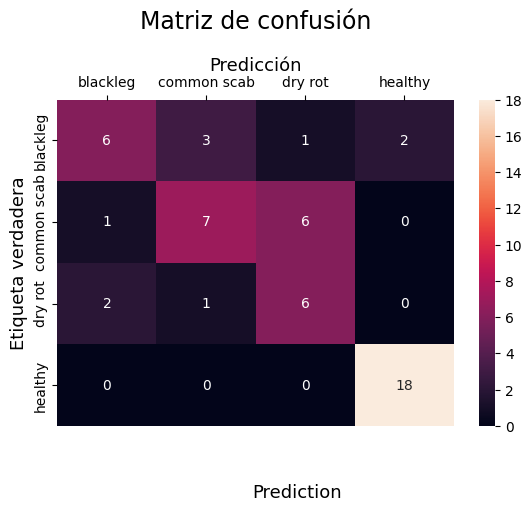

In [ ]:
# Matriz de confusión para SVM aplicado a imágenes no filtradas
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

Las papas infectadas por blackleg fueron confundidas en 3 casos por papas infectadas por common scab, una vez como infectada por dry rot, y en dos casos fueron etiquetadas erróneamente como papas sanas.

En el caso de las papas infectadas por common scab, una fue clasificada erróneamente como papa infectada por blackleg y 6 fueron clasificadas como papas infectadas por dry rot.

En el caso de las papas infectadas por dry rot, dos fueron clasificadas como papas infectadas por blackleg, y una como infectada por common scab.

En el caso de las papas sanas, todas fueron clasificadas correctamente.



In [ ]:
print('Accuracy  :', accuracy_score(y_test, y_pred)*100 ,"%")
print('Precision :' , precision_score(y_test, y_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_test, y_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_test, y_pred, average='weighted')*100 ,"%")

Accuracy  : 69.81132075471697 %
Precision : 70.30742842063596 %
Recall    : 69.81132075471697 %
F1 Score  : 69.1676704626059 %


## Clasificador Support Vector Machine para dataset filtro Gaussiano

La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [ ]:
ex_time = []
half_time = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_g=[]
    target_arr_g=[]
    datadir_g='/content/drive/MyDrive/potato/data_g'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir_g,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_g.append(img_resized.flatten())
            target_arr_g.append(Categoría.index(i))
    flat_data_g=np.array(flat_data_arr_g)
    target_g=np.array(target_arr_g)
    df_papa_g=pd.DataFrame(flat_data_g)
    df_papa_g['Categoría']=target_g
    df_papa_g

    x_g=df_papa_g.iloc[:,:-1]
    y_g=df_papa_g.iloc[:,-1]
    x_g_train,x_g_test,y_g_train,y_g_test=train_test_split(x_g,y_g,test_size=0.20,random_state=42)

    classifier_g = SVC(kernel = 'rbf', random_state = 0)
    classifier_g.fit(x_g_train, y_g_train)

    y_g_pred = classifier_g.predict(x_g_test)


    end = time.perf_counter()
    total = end - start
    print(f"Elapsed: {(total)} s")
    ex_time.append(total)
    half_t = (total/2)
    half_time.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 16.890511685000092 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 15.295180963000348 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 14.103624062000108 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 14.166673102999994 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 14.040551738999966 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 14.019864381999923 s
loading... category : blackl

In [ ]:
print("Tiempo mínimo ", min(ex_time), 's')
print("Tiempo máximo: ", max(ex_time), 's')
print("Tiempo promedio: ", sum(ex_time)/len(ex_time),'s')
print("Desviación estándar del tiempo: ", np.std(ex_time), 's')

Tiempo mínimo  13.883008762999907 s
Tiempo máximo:  16.890511685000092 s
Tiempo promedio:  14.280933565999991 s
Desviación estándar del tiempo:  0.7721213330199015 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time)/len(half_time), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time), 's')

Tiempo mínimo mitad ejecución  6.9415043814999535 s
Tiempo máximo mitad ejecución:  8.445255842500046 s
Tiempo promedio mitad ejecución:  7.1404667829999955 s
Desviación estándar del tiempo mitad ejecución:  0.38606066650995075 s


In [ ]:
y_g_pred

array([3, 3, 3, 2, 0, 0, 1, 3, 0, 2, 1, 3, 0, 3, 3, 3, 1, 0, 3, 1, 1, 2,
       2, 3, 1, 1, 0, 2, 0, 1, 2, 3, 3, 1, 0, 2, 2, 3, 3, 2, 3, 2, 1, 2,
       0, 0, 3, 0, 1, 1, 3, 2, 0])

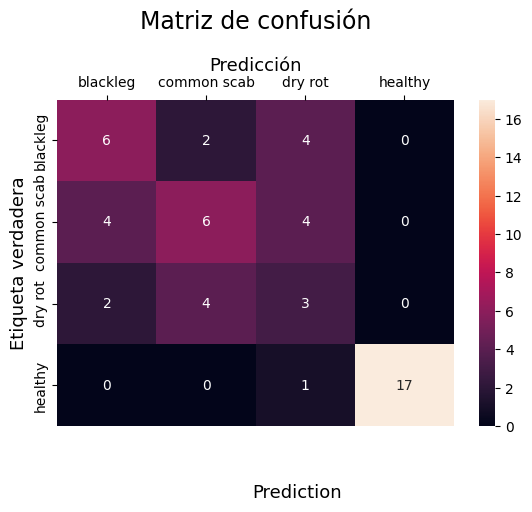

In [ ]:
cm = confusion_matrix(y_g_test, y_g_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


En el caso de las papas infectadas con blackleg, 2 fueron confundidas con papas infectadas por common scab, y 4 fueron etiquetadas erróneamente como papas infectadas por dry rot.

En el caso de las papas infectadas por common scab, 4 fueron etiquetadas como infectadas por blackleg, y 4 como infectadas por dry rot.

Para el caso de las papas afectadas por dry rot, 2 fueron etiquetadas como infectadas por blackleg, y 4 como infectadas por common scab.

Una papa sana fue clasificada como papa infectada con dry rot.

In [ ]:
print('Accuracy  :', accuracy_score(y_g_test, y_g_pred)*100 ,"%")
print('Precision :' , precision_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")

Accuracy  : 60.37735849056604 %
Precision : 62.735849056603776 %
Recall    : 60.37735849056604 %
F1 Score  : 61.356002488077955 %


## Clasificador Support Vector Machine para dataset filtro Sobel

La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [ ]:
ex_time_s = []
half_time_s = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_s=[]
    target_arr_s=[]
    datadir_s='/content/drive/MyDrive/potato/data_s'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir_s,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_s.append(img_resized.flatten())
            target_arr_s.append(Categoría.index(i))
    flat_data_s=np.array(flat_data_arr_s)
    target_s=np.array(target_arr_s)
    df_papa_s=pd.DataFrame(flat_data_s)
    df_papa_s['Categoría']=target_s
    df_papa_s

    x_s=df_papa_s.iloc[:,:-1]
    y_s=df_papa_s.iloc[:,-1]
    x_s_train,x_s_test,y_s_train,y_s_test=train_test_split(x_s,y_s,test_size=0.20,random_state=42)

    classifier_s = SVC(kernel = 'rbf', random_state = 0)
    classifier_s.fit(x_s_train, y_s_train)

    y_s_pred = classifier_s.predict(x_s_test)


    end = time.perf_counter()
    total = end - start
    print(f"Elapsed: {(total)} s")
    ex_time_s.append(total)
    half_t = (total/2)
    half_time_s.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 13.564141177999772 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 13.33406307999985 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 13.251854835999893 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 13.61692467299963 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 13.631530242999816 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 14.10839603400018 s
loading... category : blackleg


In [ ]:
print("Tiempo mínimo ", min(ex_time_s), 's')
print("Tiempo máximo: ", max(ex_time_s), 's')
print("Tiempo promedio: ", sum(ex_time_nf)/len(ex_time_s), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_s), 's')

Tiempo mínimo  13.251854835999893 s
Tiempo máximo:  20.46798679800031 s
Tiempo promedio:  15.949882041866628 s
Desviación estándar del tiempo:  1.7135053655554153 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time_s), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_s), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time_s)/len(half_time_s), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_s), 's')

Tiempo mínimo mitad ejecución  6.625927417999947 s
Tiempo máximo mitad ejecución:  10.233993399000155 s
Tiempo promedio mitad ejecución:  7.319302705166698 s
Desviación estándar del tiempo mitad ejecución:  0.8567526827777077 s


In [ ]:
y_s_pred

array([3, 3, 3, 1, 1, 2, 2, 3, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 3, 1, 2, 2,
       1, 3, 1, 2, 0, 1, 2, 0, 0, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 0, 1, 0,
       0, 2, 3, 0, 0, 1, 3, 2, 0])

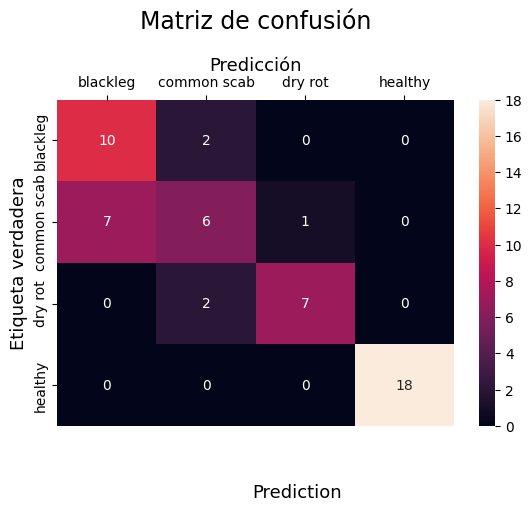

In [ ]:
cm = confusion_matrix(y_s_test, y_s_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

Analizando las etiquetas asignadas a las papas infectadas por blackleg, 2 fueron clasificadas como infectadas con common scab.

En el caso de las papas infectadas por common scab, 7 fueron etiquetadas como papas afectadas por blackleg, y una como infectada por dry rot.

En el caso de las papas infectadas por dry rot, 2 fueron clasificadas como papas infectadas por common scab.

Todas las papas sanas fueron clasificadas correctamente.

In [ ]:
print('Accuracy  :', accuracy_score(y_s_test, y_s_pred)*100 ,"%")
print('Precision :' , precision_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")

Accuracy  : 77.35849056603774 %
Precision : 77.98834628190899 %
Recall    : 77.35849056603774 %
F1 Score  : 76.76910712235447 %


## Clasificador Support Vector Machine para dataset filtro Máximo
La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [ ]:
ex_time_max = []
half_time_max = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_max=[]
    target_arr_max=[]
    datadir_max='/content/drive/MyDrive/potato/data_max'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir_s,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_max.append(img_resized.flatten())
            target_arr_max.append(Categoría.index(i))
    flat_data_max=np.array(flat_data_arr_max)
    target_max=np.array(target_arr_max)
    df_papa_max=pd.DataFrame(flat_data_max)
    df_papa_max['Categoría']=target_max
    df_papa_max

    x_max=df_papa_max.iloc[:,:-1]
    y_max=df_papa_max.iloc[:,-1]
    x_max_train,x_max_test,y_max_train,y_max_test=train_test_split(x_max,y_max,test_size=0.20,random_state=42)

    classifier_max = SVC(kernel = 'rbf', random_state = 0)
    classifier_max.fit(x_max_train, y_max_train)

    y_max_pred = classifier_max.predict(x_max_test)


    end = time.perf_counter()
    total = end - start
    print(f"Elapsed: {(total)} s")
    ex_time_max.append(total)
    half_t = (total/2)
    half_time_max.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 18.433640264999667 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 17.59293885400075 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 15.552101395000136 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 19.258840241000144 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 21.351786717000323 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 15.337139960000059 s
loading... category : blackle

In [ ]:
print("Tiempo mínimo ", min(ex_time_max), 's')
print("Tiempo máximo: ", max(ex_time_max), 's')
print("Tiempo promedio: ", sum(ex_time_max)/len(ex_time_max), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_max), 's')

Tiempo mínimo  14.37926333499945 s
Tiempo máximo:  21.36820885399993 s
Tiempo promedio:  18.41094120166666 s
Desviación estándar del tiempo:  2.377224933546651 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time_max), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_max))
print("Tiempo promedio mitad ejecución: ", sum(half_time_max)/len(half_time_max), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_max), 's')

Tiempo mínimo mitad ejecución  7.189631667499725 s
Tiempo máximo mitad ejecución:  10.684104426999966
Tiempo promedio mitad ejecución:  9.20547060083333 s
Desviación estándar del tiempo mitad ejecución:  1.1886124667733255 s


In [ ]:
y_max_pred

array([3, 3, 3, 1, 1, 2, 2, 3, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 3, 1, 2, 2,
       1, 3, 1, 2, 0, 1, 2, 0, 0, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 0, 1, 0,
       0, 2, 3, 0, 0, 1, 3, 2, 0])

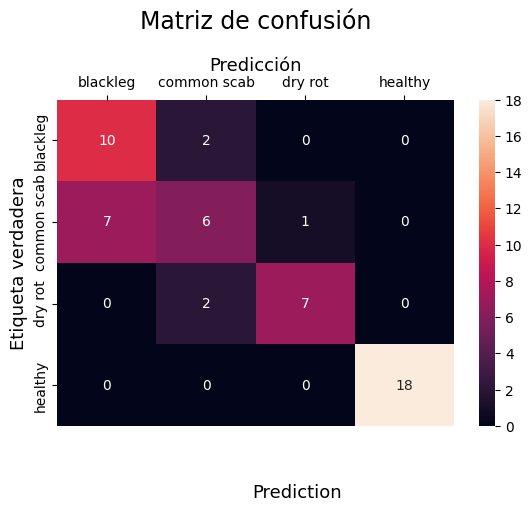

In [ ]:
cm = confusion_matrix(y_max_test, y_max_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

Analizando las etiquetas asignadas a las papas infectadas por blackleg, 2 fueron clasificadas como infectadas con common scab.

En el caso de las papas infectadas por common scab, 7 fueron etiquetadas como papas afectadas por blackleg, y una como infectada por dry rot.

En el caso de las papas infectadas por dry rot, 2 fueron clasificadas como papas infectadas por common scab.

Todas las papas sanas fueron clasificadas correctamente.

In [ ]:
print('Accuracy  :', accuracy_score(y_max_test, y_max_pred)*100 ,"%")
print('Precision :' , precision_score(y_max_test, y_max_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_max_test, y_max_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_max_test, y_max_pred, average='weighted')*100 ,"%")

Accuracy  : 77.35849056603774 %
Precision : 77.98834628190899 %
Recall    : 77.35849056603774 %
F1 Score  : 76.76910712235447 %


## Clasificador Support Vector Machine para dataset filtro Mínimo
La determinación del tiempo de procesamiento del clasificador SVM será realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

In [ ]:
ex_time_min = []
half_time_min = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_min=[]
    target_arr_min=[]
    datadir_min='/content/drive/MyDrive/potato/data_min'

    for i in Categoría:
        print(f'loading... category : {i}')
        path=os.path.join(datadir_s,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_min.append(img_resized.flatten())
            target_arr_min.append(Categoría.index(i))
    flat_data_min=np.array(flat_data_arr_min)
    target_min=np.array(target_arr_min)
    df_papa_min=pd.DataFrame(flat_data_min)
    df_papa_min['Categoría']=target_min
    df_papa_min

    x_min=df_papa_min.iloc[:,:-1]
    y_min=df_papa_min.iloc[:,-1]
    x_min_train,x_min_test,y_min_train,y_min_test=train_test_split(x_min,y_min,test_size=0.20,random_state=42)

    classifier_min = SVC(kernel = 'rbf', random_state = 0)
    classifier_min.fit(x_min_train, y_min_train)

    y_min_pred = classifier_min.predict(x_min_test)


    end = time.perf_counter()
    total = end - start
    print(f"Elapsed: {(total)} s")
    ex_time_min.append(total)
    half_t = (total/2)
    half_time_min.append(half_t)
    j +=1

loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 16.82566957600011 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 14.302179245999469 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 21.794300927999757 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 15.23852830099986 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 15.707467363000433 s
loading... category : blackleg
loading... category : common_scab
loading... category : dry_rot
loading... category : healthy_potato
Elapsed: 16.429424899999503 s
loading... category : blackleg

In [ ]:
print("Tiempo mínimo ", min(ex_time_min), 's')
print("Tiempo máximo: ", max(ex_time_min), 's')
print("Tiempo promedio: ", sum(ex_time_min)/len(ex_time_min), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_min), 's')

Tiempo mínimo  13.226110018000327 s
Tiempo máximo:  21.794300927999757 s
Tiempo promedio:  15.476888640200013 s
Desviación estándar del tiempo:  2.2163544748308306 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time_min), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_min), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time_min)/len(half_time_min), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_min), 's')

Tiempo mínimo mitad ejecución  6.613055009000163 s
Tiempo máximo mitad ejecución:  10.897150463999878 s
Tiempo promedio mitad ejecución:  7.738444320100006 s
Desviación estándar del tiempo mitad ejecución:  1.1081772374154153 s


In [ ]:
y_min_pred

array([3, 3, 3, 1, 1, 2, 2, 3, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 3, 1, 2, 2,
       1, 3, 1, 2, 0, 1, 2, 0, 0, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 0, 1, 0,
       0, 2, 3, 0, 0, 1, 3, 2, 0])

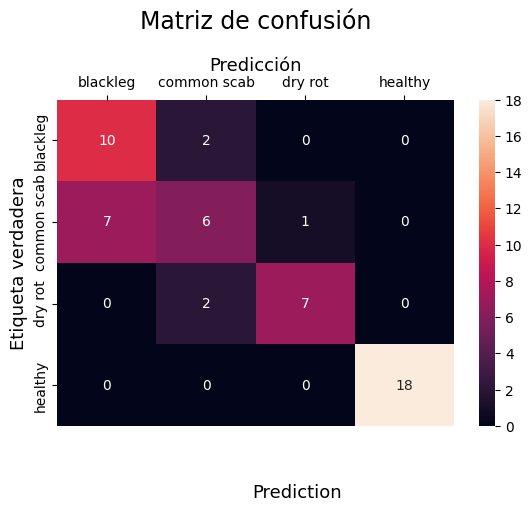

In [ ]:
cm = confusion_matrix(y_min_test, y_min_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

Analizando las etiquetas asignadas a las papas infectadas por blackleg, 2 fueron clasificadas como infectadas con common scab.

En el caso de las papas infectadas por common scab, 7 fueron etiquetadas como papas afectadas por blackleg, y una como infectada por dry rot.

En el caso de las papas infectadas por dry rot, 2 fueron clasificadas como papas infectadas por common scab.

Todas las papas sanas fueron clasificadas correctamente.

In [ ]:
print('Accuracy  :', accuracy_score(y_min_test, y_min_pred)*100 ,"%")
print('Precision :' , precision_score(y_min_test, y_min_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_min_test, y_min_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_min_test, y_min_pred, average='weighted')*100 ,"%")

Accuracy  : 77.35849056603774 %
Precision : 77.98834628190899 %
Recall    : 77.35849056603774 %
F1 Score  : 76.76910712235447 %


## Análisis de resultados del procesamiento de la muestra del dataset de papas

| **Modelo**      | **Accuracy**                                                                                  | **Precision** | **Recall** | **F1 Score**|
|------------------|---------------------------------------------------------------------------------------------------|-----------------------------|-------------------------|------------------------------------------------------------------------------------------------------|
| **Modelo 1 (SVM sin filtro)** |69.81 %| 70.31 %| 69.81 %| 69.17 %|
| **Modelo 2 (SVM filtro Gaussiano)** | 60.38 % | 62.74 %| 60.38 %| 61.36 %|
| **Modelo 3 (SVM filtro Sobel)** | 77.36 % | 77.99 %| 77.36 %| 76.77 % |
| **Modelo 4 (SVM filtro Máximo)** |77.36 %  | 77.99 %| 77.36 %|76.77 %|
| **Modelo 5 (SVM filtro Mínimo)** |77.36 % | 77.99 %| 77.36 %|76.77 %|

Los mejores resultados fueron obtenidos al clasificar las imágenes a las cuales se les aplicó un filtro Sobel, un filtro Máximo y un filtro Mínimo. Esto es corroborado al comparar los resultados de sus matrices de confusión.

El filtro que no funcionó bien es el Gaussiano, debido a que sus resultados fueron peores que al realizar la clasificación de las imágenes sin filtrar.

| **Modelo**      | **t máx (s)**                                                                                  | **t min (s)** | **t prom. (s)** | **std. t (s)**|
|------------------|---------------------------------------------------------------------------------------------------|-----------------------------|-------------------------|------------------------------------------------------------------------------------------------------|
| **Modelo 1 (SVM sin filtro)** |13.80| 20.91| 15.95| 1.87|
| **Modelo 2 (SVM filtro Gaussiano)** | 13.88| 16.89| 14.28| 0.77|
| **Modelo 3 (SVM filtro Sobel)** | 13.25| 20.46|15.95| 1.71|
| **Modelo 4 (SVM filtro Máximo)** |14.38| 21.37| 18.41|2.38|
| **Modelo 5 (SVM filtro Mínimo)** |13.26|21.79|15.48|2.22|

| **Modelo**      | **t/2 máx (s)**                                                                                  | **t/2 min (s)** | **t/2 prom. (s)** | **std. t/2 (s)**|
|------------------|---------------------------------------------------------------------------------------------------|-----------------------------|-------------------------|------------------------------------------------------------------------------------------------------|
| **Modelo 1 (SVM sin filtro)** |6.90| 10.45| 7.97| 0.94|
| **Modelo 2 (SVM filtro Gaussiano)** | 6.94| 8.45|7.14|0.39|
| **Modelo 3 (SVM filtro Sobel)** |6.63|10.23|7.32|0.86|
| **Modelo 4 (SVM filtro Máximo)** |7.19|10.69| 9.21|1.18|
| **Modelo 5 (SVM filtro Mínimo)** |6.61| 10.90|7.74|1.11|

# Conclusiones